<a href="https://colab.research.google.com/github/do-it-fast/DSc-Lab-7thSem/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")
install.packages("cluster")
install.packages("factoextra")
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(cluster)
library(dplyr)
library(gridExtra)

In [ ]:
data('USArrests') 
d_frame <- USArrests
d_frame <- na.omit(d_frame)  #Removing the missing values
d_frame <- scale(d_frame)
head(d_frame)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


In [ ]:
kmeans2 <- kmeans(d_frame, centers = 2, nstart = 25)
str(kmeans2)

List of 9
 $ cluster     : Named int [1:50] 2 2 2 1 2 2 1 1 2 2 ...
  ..- attr(*, "names")= chr [1:50] "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ centers     : num [1:2, 1:4] -0.67 1.005 -0.676 1.014 -0.132 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:4] "Murder" "Assault" "UrbanPop" "Rape"
 $ totss       : num 196
 $ withinss    : num [1:2] 56.1 46.7
 $ tot.withinss: num 103
 $ betweenss   : num 93.1
 $ size        : int [1:2] 30 20
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


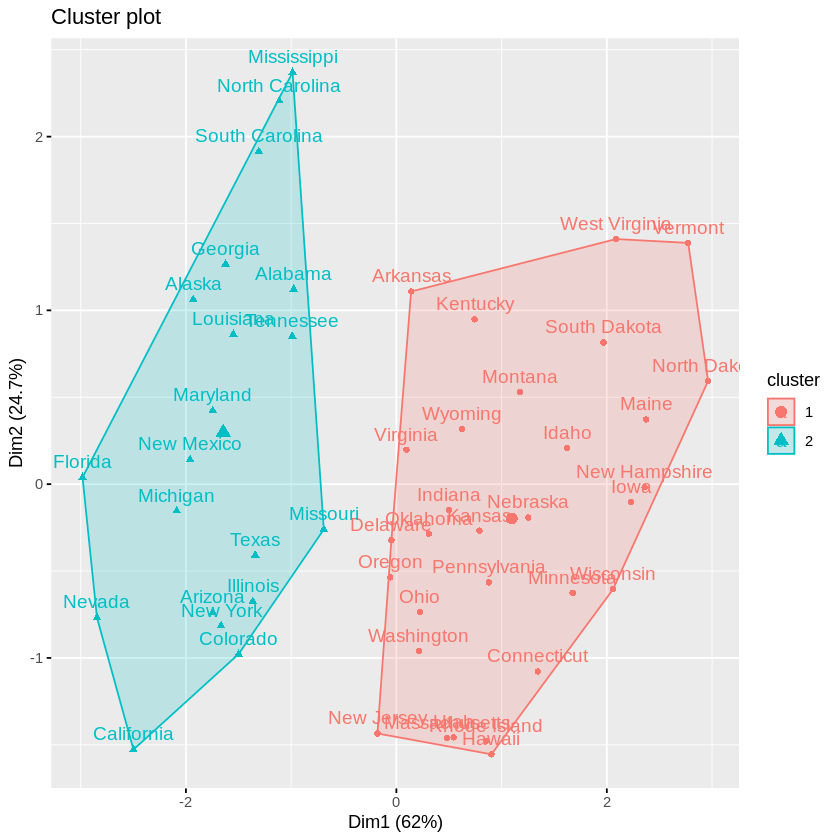

In [ ]:
fviz_cluster(kmeans2, data = d_frame)

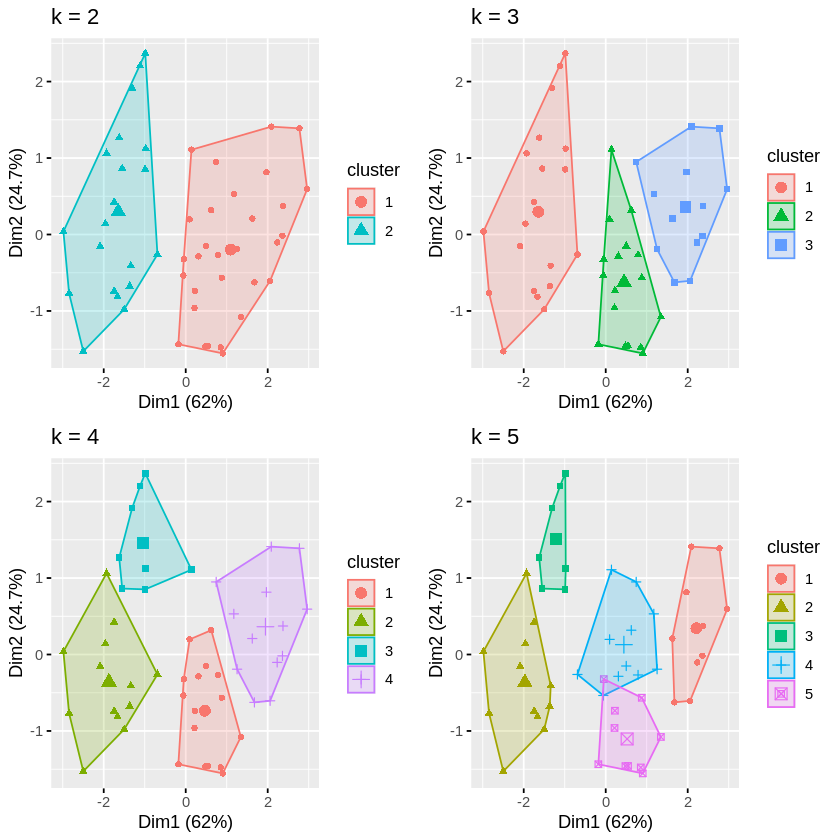

In [ ]:
kmeans3 <- kmeans(d_frame, centers = 3, nstart = 25)  #DataFlair
kmeans4 <- kmeans(d_frame, centers = 4, nstart = 25)  
kmeans5 <- kmeans(d_frame, centers = 5, nstart = 25)  
#Comparing the Plots
plot1 <- fviz_cluster(kmeans2, geom = "point", data = d_frame) + ggtitle("k = 2")
plot2 <- fviz_cluster(kmeans3, geom = "point", data = d_frame) + ggtitle("k = 3")
plot3 <- fviz_cluster(kmeans4, geom = "point", data = d_frame) + ggtitle("k = 4")
plot4 <- fviz_cluster(kmeans5, geom = "point", data = d_frame) + ggtitle("k = 5")
grid.arrange(plot1, plot2, plot3, plot4, nrow = 2)

Elbow method

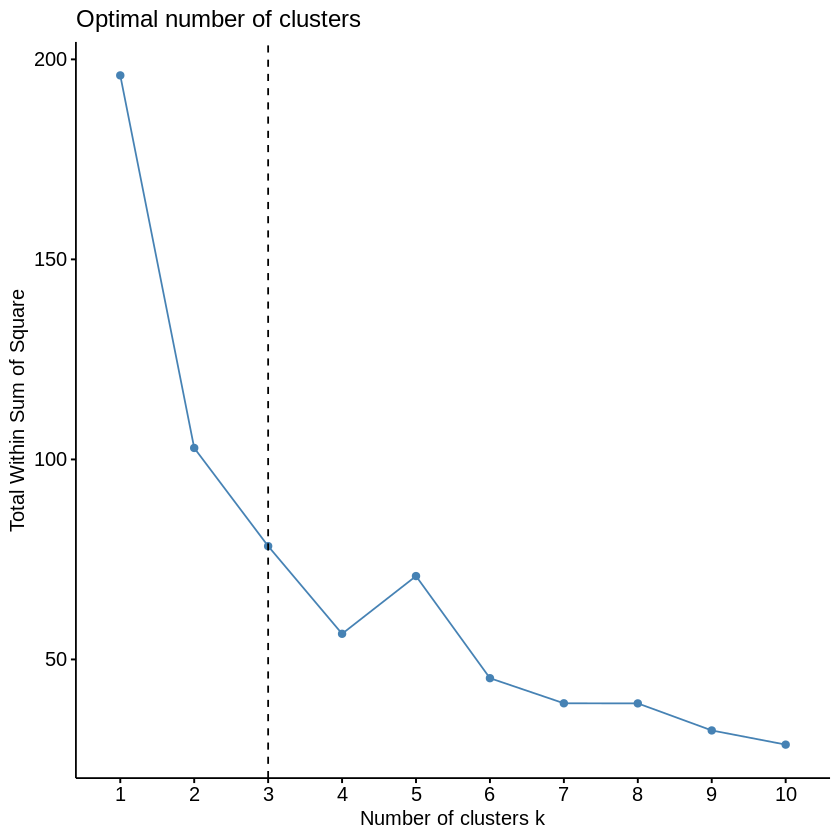

In [ ]:
fviz_nbclust(d_frame, kmeans, method = "wss") + geom_vline(xintercept = 3, linetype = 2)

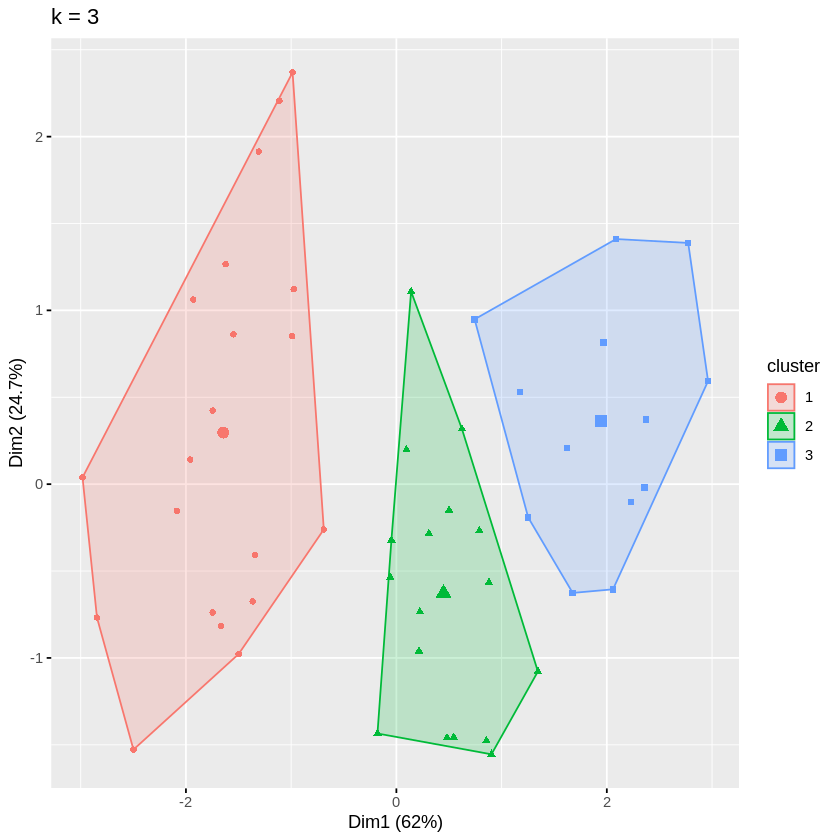

In [ ]:
finalplot <- fviz_cluster(kmeans3, geom = "point", data = d_frame) + ggtitle("k = 3")
finalplot